<a href="https://colab.research.google.com/github/ghl051/ghl051/blob/main/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
!pip install -U kaleido
import kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
df = pd.read_csv(r'/content/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


In [3]:
df.shape

(167, 10)

In [5]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df = df.drop('country', axis = 1)

In [7]:
scaler = StandardScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
df1 = pd.DataFrame(scaled, columns=df.columns)

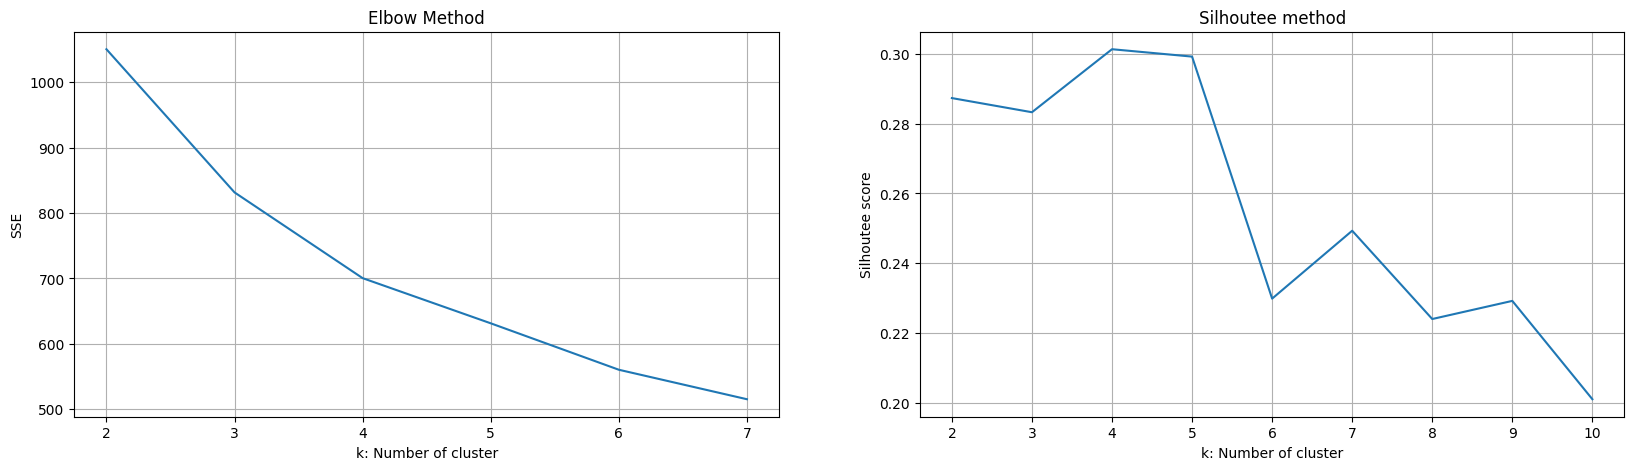

In [11]:
sse={};sil =[]; kmax = 10
fig =plt.subplots(nrows = 1, ncols = 2, figsize =(20,5))

plt.subplot(1,2,1)
for k in range (2,8):
  kmeans = KMeans(n_clusters = k, max_iter = 300).fit(df1)
  sse[k] = kmeans.inertia_
sns.lineplot(x = list(sse.keys()), y= list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k: Number of cluster")
plt.ylabel("SSE")
plt.grid()


plt.subplot(1,2,2)
for k in range(2, kmax + 1):
  kmeans = KMeans(n_clusters = k).fit(df1)
  labels = kmeans.labels_
  sil.append(silhouette_score(df1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2, kmax + 1), y = sil)
plt.title('Silhoutee method')
plt.xlabel('k: Number of cluster')
plt.ylabel('Silhoutee score')
plt.grid()

In [12]:
# fit model with number of cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=167, n_init=5)
kmeans.fit(df)

KMeans(max_iter=167, n_clusters=3, n_init=5)

In [13]:
# assign the label
df['Cluster'] = kmeans.labels_
df.head(20)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553,0
1,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090,0
2,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460,0
3,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530,0
4,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200,0
5,14.50,18.90,8.10,16.00,18700,20.90,75.80,2.37,10300,0
6,18.10,20.80,4.40,45.30,6700,7.77,73.30,1.69,3220,0
7,4.80,19.80,8.73,20.90,41400,1.16,82.00,1.93,51900,1
8,4.30,51.30,11.00,47.80,43200,0.87,80.50,1.44,46900,1
9,39.20,54.30,5.88,20.70,16000,13.80,69.10,1.92,5840,0


<Axes: xlabel='child_mort', ylabel='Count'>

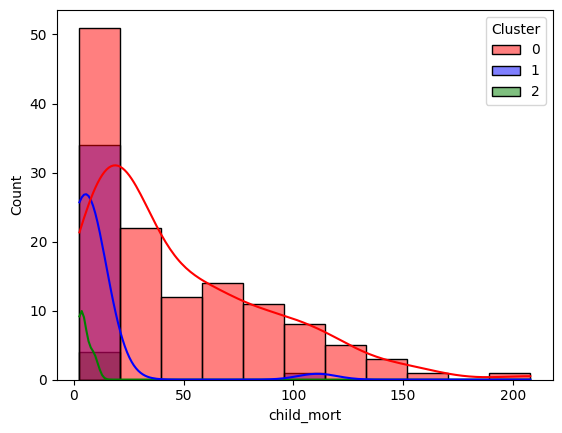

In [14]:
palette = ['red', 'blue','green','black', 'yellow']
df["cluster"] = kmeans.labels_
sns.histplot(x='child_mort',hue= 'Cluster', data = df, palette= palette, kde=True)